<a href="https://colab.research.google.com/github/Huxwell/ColabNNs/blob/main/cats_n_dogs_generate_multicategory_dataset_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Just viewing my options
What was done:
*   4 variants of concat 
*   assume all images will be resized to 224x224





In [1]:
# import torch.nn as nn
# import torch
# import torch.optim as optim
# import torch.nn.functional as F
# from torchvision import datasets, models, transforms
# from torch.utils.data import DataLoader, Dataset
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import glob
# from tqdm import tqdm
from PIL import Image
import random # do random.seed(13) before every shuffle. order of shuffle() execution changes results order.

In [2]:
dataset_dir = '/content/drive/MyDrive/cats_n_dogs_unsure/dogs-vs-cats-redux-kernels-edition'
os.listdir(dataset_dir)

['sample_submission.csv', 'test.zip', 'train.zip']

In [3]:
os.makedirs('local_data/', exist_ok=True)
train_dir = 'local_data/train'

In [4]:
!pwd
!ls /content/local_data/train


/content
ls: cannot access '/content/local_data/train': No such file or directory


In [5]:
with zipfile.ZipFile(os.path.join(dataset_dir, 'train.zip')) as train_zip:
    train_zip.extractall('local_data')

In [6]:
os.listdir(train_dir)[:5]

['cat.9724.jpg', 'dog.9814.jpg', 'dog.321.jpg', 'dog.1189.jpg', 'dog.6509.jpg']

In [7]:
cats_list = sorted(glob.glob(os.path.join(train_dir,'cat*.jpg')))
dogs_list = sorted(glob.glob(os.path.join(train_dir,'dog*.jpg')))
print(len(cats_list))
print(len(dogs_list))
random.seed(13)
random.shuffle(cats_list)
random.seed(13) #multiple seed() executions are on purpose.
random.shuffle(dogs_list)
print(cats_list[:3])
print(dogs_list[:3])
# some sanity check to make sure no uncontrolled randomness beyond this point
assert cats_list[2] == 'local_data/train/cat.801.jpg'
assert dogs_list[2] == 'local_data/train/dog.801.jpg'
assert len(cats_list) == len(dogs_list)


12500
12500
['local_data/train/cat.8473.jpg', 'local_data/train/cat.3808.jpg', 'local_data/train/cat.801.jpg']
['local_data/train/dog.8473.jpg', 'local_data/train/dog.3808.jpg', 'local_data/train/dog.801.jpg']


## This time I have to shuffle cats list and dogs list separately
So that each cat photo can be matched with a dog photo.

In [8]:
test_cats = cats_list[10000:]
test_dogs = dogs_list[10000:]
print(len(test_cats))
print(len(test_dogs))

random.seed(13)
random.shuffle(test_cats)

random.seed(1313) # you get the same indeces if you do seed(13) again !!! order doesn't depend on content !!!
random.shuffle(test_dogs)

print("test_cats",test_cats[:9])
assert test_cats[0] == 'local_data/train/cat.4660.jpg'

print("test_dogs",test_dogs[:9])
assert test_dogs[0] == 'local_data/train/dog.1383.jpg'

2500
2500
test_cats ['local_data/train/cat.4660.jpg', 'local_data/train/cat.11523.jpg', 'local_data/train/cat.486.jpg', 'local_data/train/cat.5677.jpg', 'local_data/train/cat.6927.jpg', 'local_data/train/cat.8045.jpg', 'local_data/train/cat.9340.jpg', 'local_data/train/cat.6436.jpg', 'local_data/train/cat.6292.jpg']
test_dogs ['local_data/train/dog.1383.jpg', 'local_data/train/dog.6442.jpg', 'local_data/train/dog.4082.jpg', 'local_data/train/dog.10995.jpg', 'local_data/train/dog.4985.jpg', 'local_data/train/dog.9930.jpg', 'local_data/train/dog.290.jpg', 'local_data/train/dog.9974.jpg', 'local_data/train/dog.2641.jpg']


In [9]:
# test_list = cats_list[10000:] + dogs_list[10000:]
# print(len(test_list))

# random.seed(13)
# random.shuffle(test_list)
# print("test",test_list[:9])
# assert test_list[4] == 'local_data/train/dog.6485.jpg'

5000
test ['local_data/train/dog.1856.jpg', 'local_data/train/dog.10017.jpg', 'local_data/train/cat.10294.jpg', 'local_data/train/dog.10931.jpg', 'local_data/train/dog.6485.jpg', 'local_data/train/cat.1128.jpg', 'local_data/train/cat.8299.jpg', 'local_data/train/dog.3665.jpg', 'local_data/train/dog.2094.jpg']


# finished here: todo: actual generation

[1319  912 1360  699 1667  961 1851 1142 1906  903]


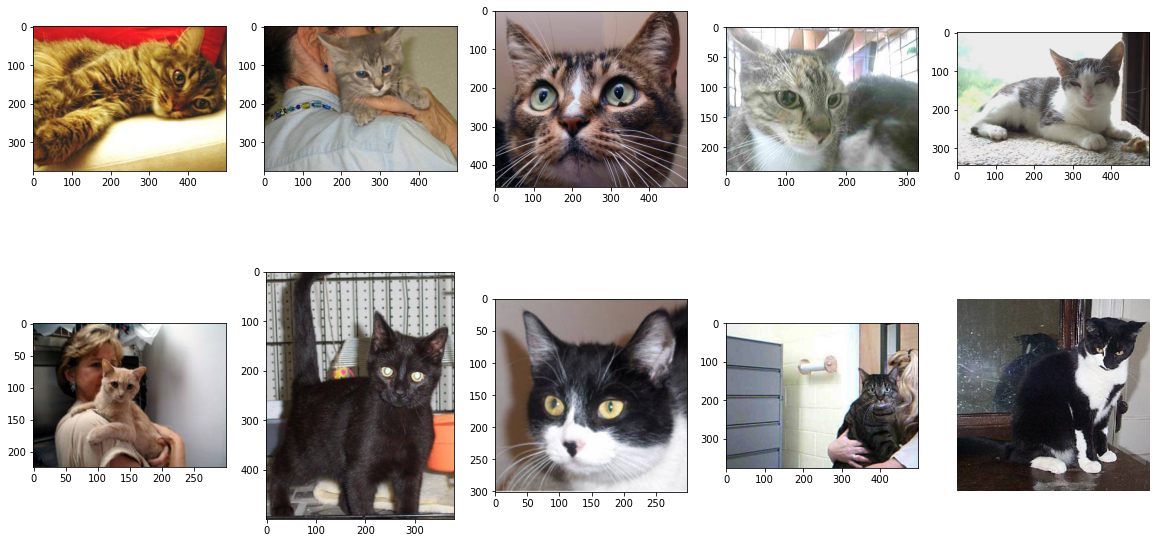

In [14]:
np.random.seed(1313131313)
random_idx = np.random.randint(1,len(test_cats),size=10)
print(random_idx)
fig = plt.figure(figsize=(20., 10.))

for i, img_idx in enumerate(random_idx):
    ax = fig.add_subplot(2,5,i+1)
    img = Image.open(test_cats[img_idx])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

[1319  912 1360  699 1667  961 1851 1142 1906  903]


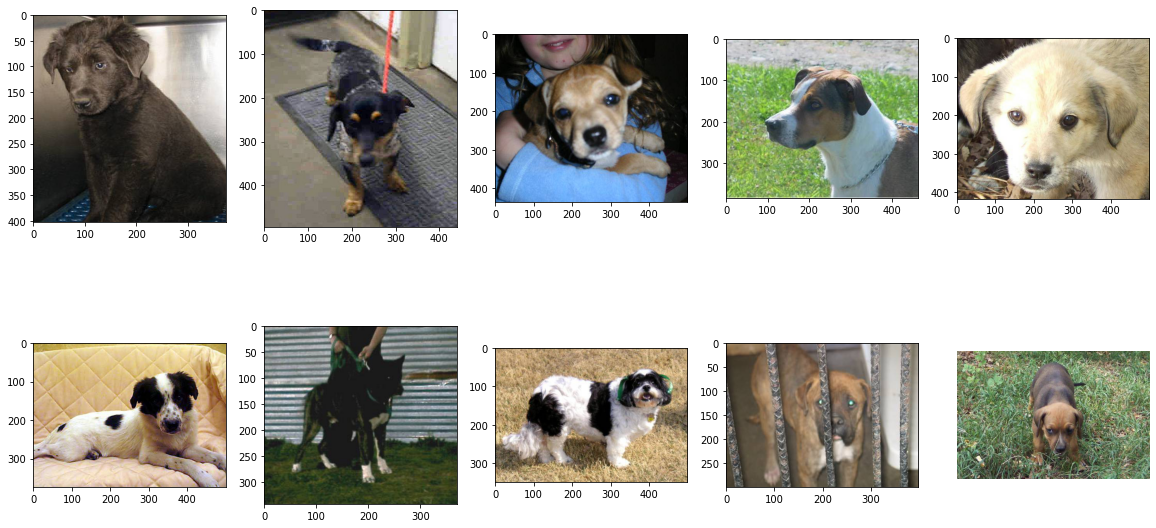

In [15]:
np.random.seed(1313131313)
random_idx = np.random.randint(1,len(test_dogs),size=10)
print(random_idx)
fig = plt.figure(figsize=(20., 10.))

for i, img_idx in enumerate(random_idx):
    ax = fig.add_subplot(2,5,i+1)
    img = Image.open(test_dogs[img_idx])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

In [26]:
def crop_center(img, cropx, cropy):
    y, x, *_ = img.shape
    startx = x // 2 - (cropx // 2)
    starty = y // 2 - (cropy // 2)    
    return img[starty:starty + cropy, startx:startx + cropx, ...]
def concat_variants(img1, img2, variant=0): #not using match case, because this is python 3.8 not 3.10
    if variant == 0:
      return np.concatenate((img1,img2), axis=0)
    elif variant == 1:
      return np.concatenate((img1,img2), axis=1)
    elif variant == 2:
      return np.concatenate((img2,img1), axis=0)
    elif variant == 3:
      return np.concatenate((img2,img1), axis=1)
    elif variant == 4:
      return np.concatenate((img2,img1), axis=0)
    elif variant == 5:
      return np.concatenate((img2,img1), axis=1)
    elif variant == 6:
      return np.concatenate((img1,img2), axis=0)
    elif variant == 7:
      return np.concatenate((img1,img2), axis=1)


[ 939  835  540 2120  383 1111  304 1629 1046 1432]
0
1
2
3
4
5
6
7
0
1


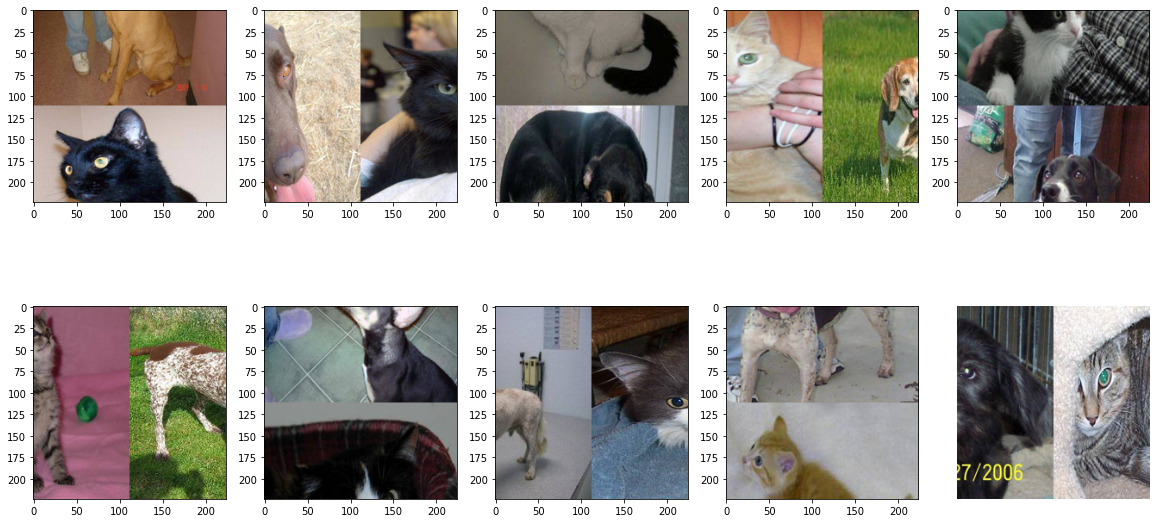

In [27]:
np.random.seed(13131313)
random_idx = np.random.randint(1,len(test_dogs),size=10)
print(random_idx)
fig = plt.figure(figsize=(20., 10.))

for i, img_idx in enumerate(random_idx):
    ax = fig.add_subplot(2,5,i+1)
    img = Image.open(test_dogs[img_idx]).resize((224,224))
    img2 = Image.open(test_cats[img_idx]).resize((224,224))
    img_concat = concat_variants(img, img2, i%8)
    plt.imshow(crop_center(img_concat, 224,224))
    i+=1

plt.axis('off')
plt.show()

In [ ]:
!rm -rvf generated/

In [ ]:
# from tqdm import tqdm
# from torchvision.utils import save_image

# batch_size=1
# train_data = dataset(test_list, transform=train_transforms)
# train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=False )


# epochs = 4
# # max = 1000
# os.makedirs('generated/', exist_ok=True)

# for epoch in range(epochs):
#     print("\n","="*30,"\n")
#     epoch_loss = 0
#     epoch_accuracy = 0
    
#     with tqdm(train_loader, unit="iteration") as tepoch:      
#       for id, (data, label, filepath) in enumerate(tepoch):
#         out_path = filepath[0].split("/")[-1].replace(".jpg",f"_crop_e_{epoch}.jpg")
#         str_label = "cat" if label.item() == 0 else "dog"
#         save_image(data,f"generated/{out_path}")
#         tepoch.set_description(f"Generating transformed images, epoch {epoch}, iteration {id}")
#         # if id >= max:
#           # break


In [ ]:
!cp -rv generated/ /content/drive/MyDrive/cat_dogs_4_contats_50_50_from_test

In [ ]:
!ls /content/drive/MyDrive/cat_dogs_4_contats_50_50_from_test | wc -l

In [ ]:
!zip -r cat_dogs_4_contats_50_50_from_test.zip /content/drive/MyDrive/cat_dogs_4_contats_50_50_from_test 

In [ ]:
!cp -rv cat_dogs_4_contats_50_50_from_test.zip /content/drive/MyDrive/cat_dogs_4_contats_50_50_from_test.zip